In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [3]:
df = pd.read_csv('/content/drive/MyDrive/mobile_dataset/train.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Data Understanding

## Atribute Types and Statistical Properties

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


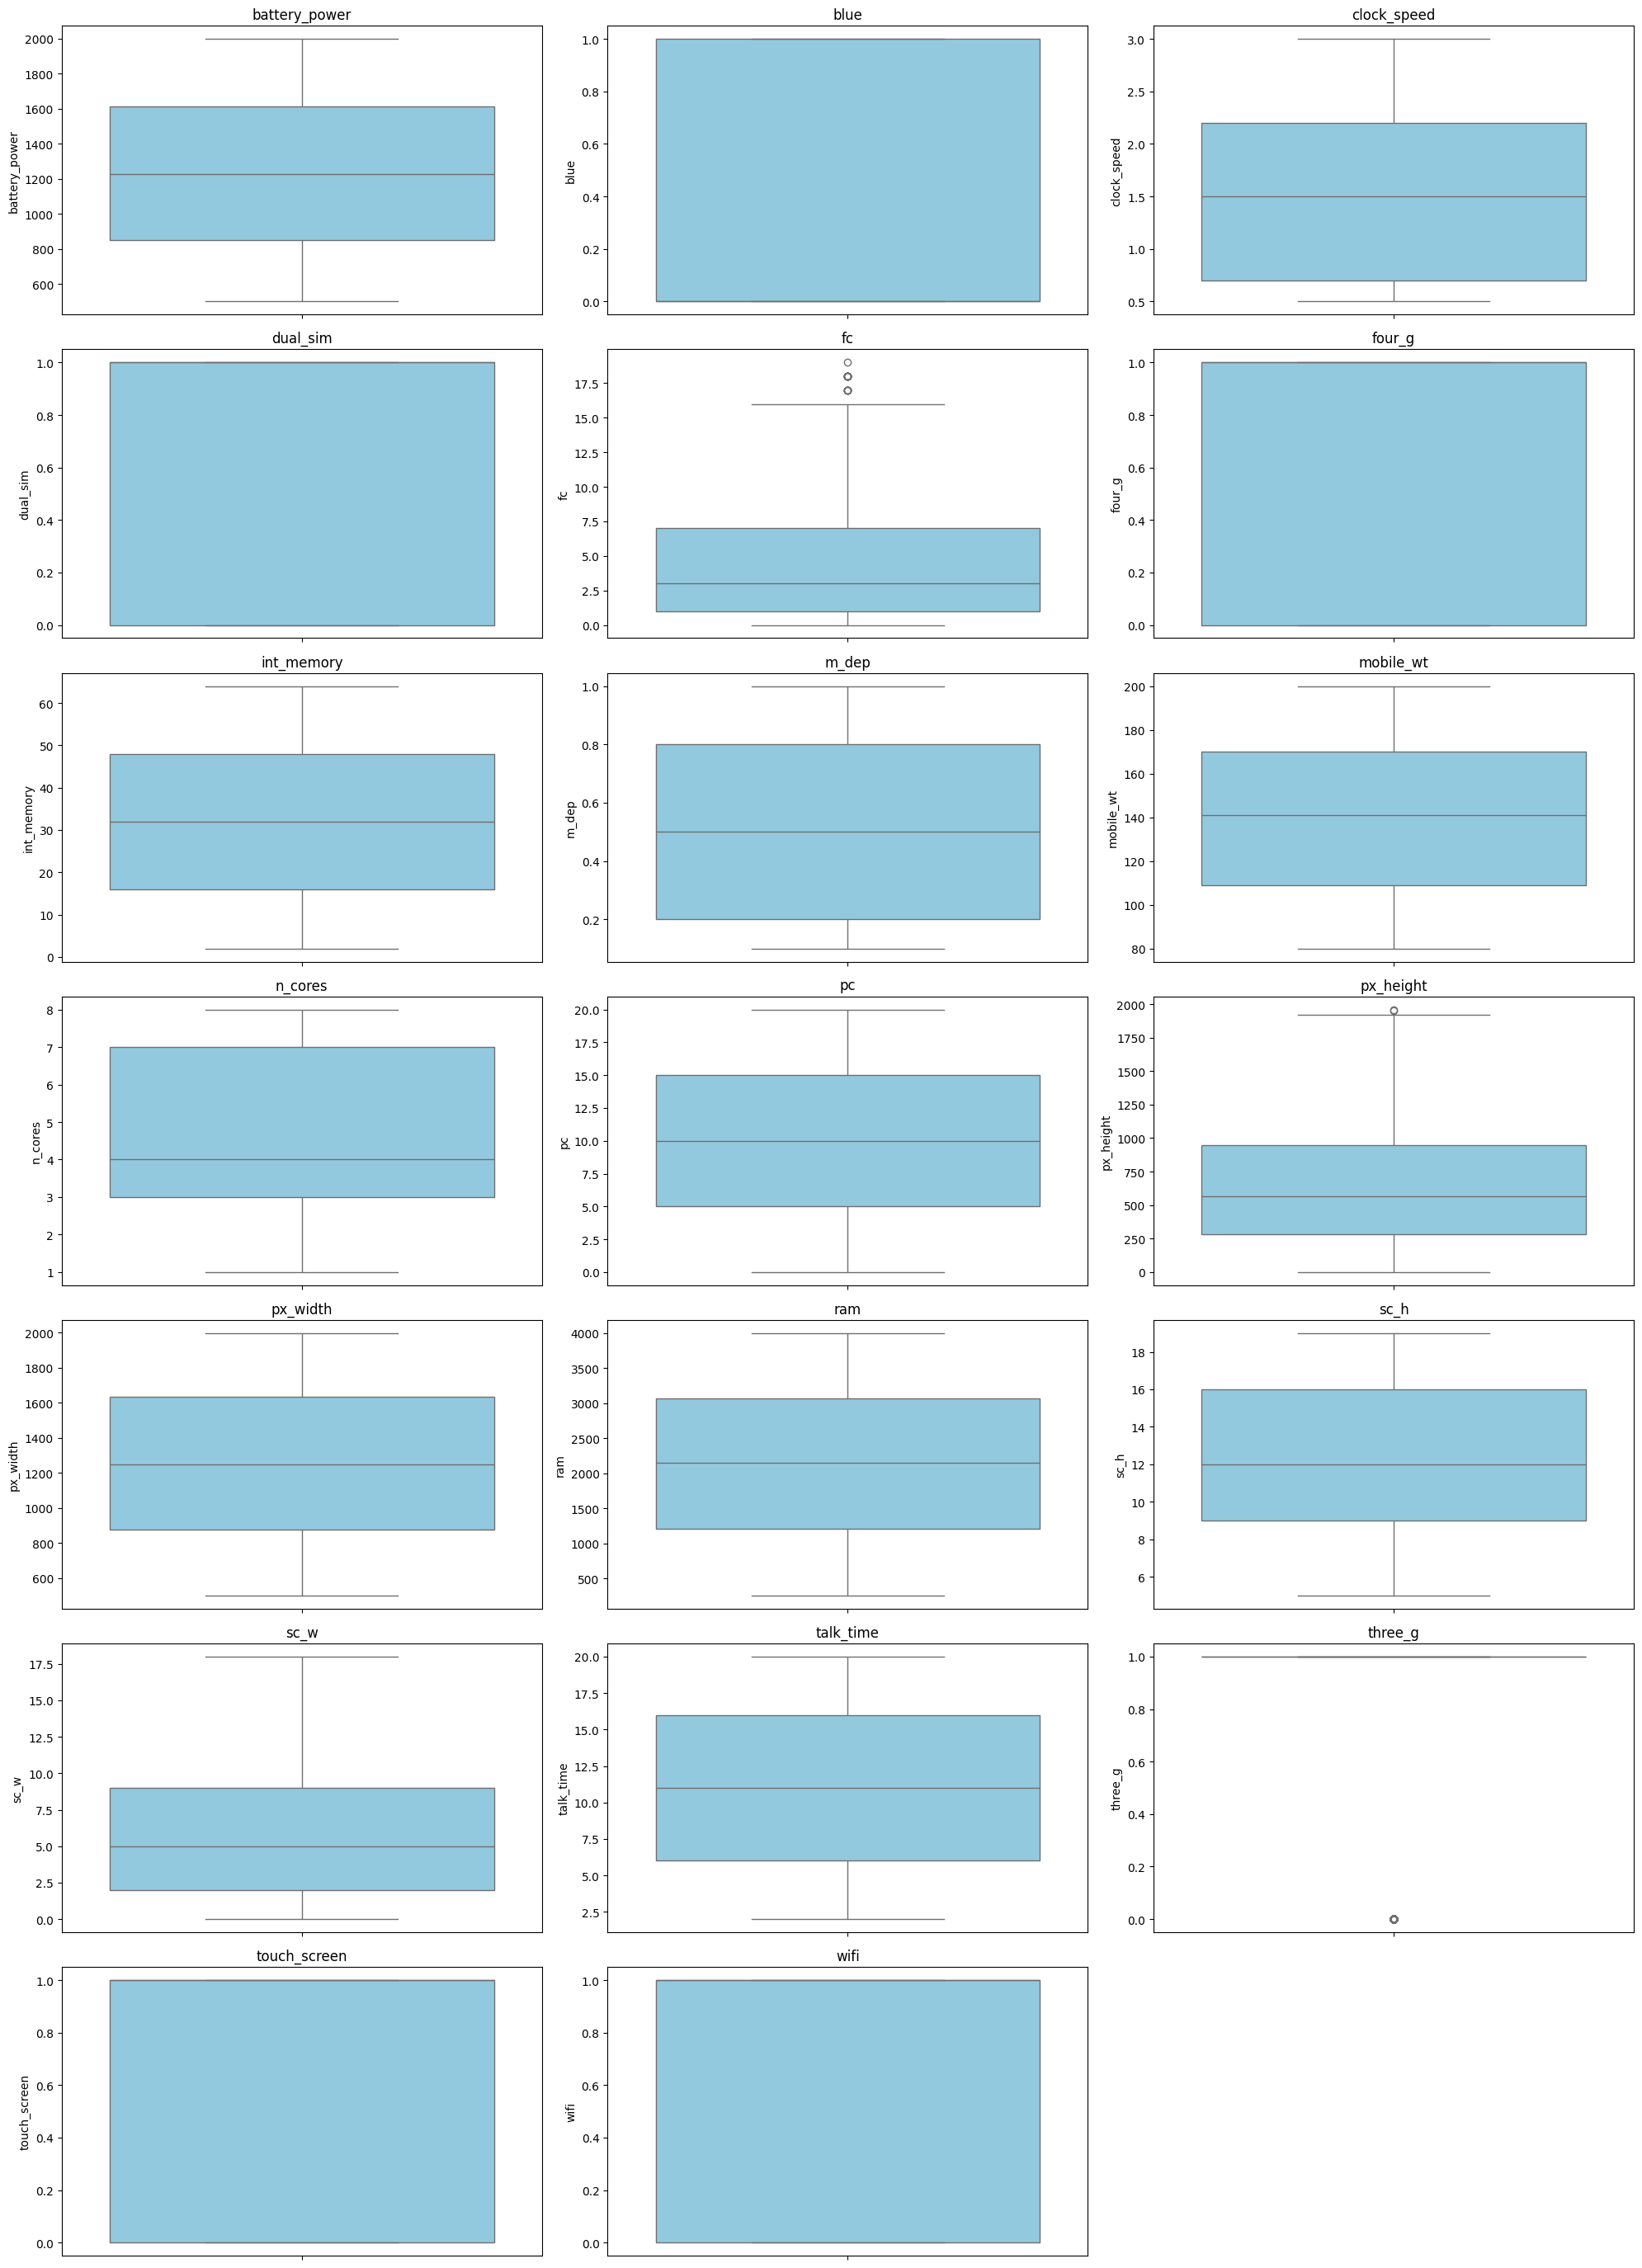

In [7]:
# visualize the statistical properties from above with box plots

# only using features (all columns except price_range)
features = df.drop(columns=['price_range'])

plt.figure(figsize=(20, 30))

for i, column in enumerate(features.columns, 1):
    plt.subplot((len(features.columns) + 2) // 3, 3, i)
    sns.boxplot(y=features[column], color="skyblue")
    plt.title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [9]:
print(df['price_range'].unique())

[1 2 3 0]


In [10]:
correlation_matrix = df.corr()

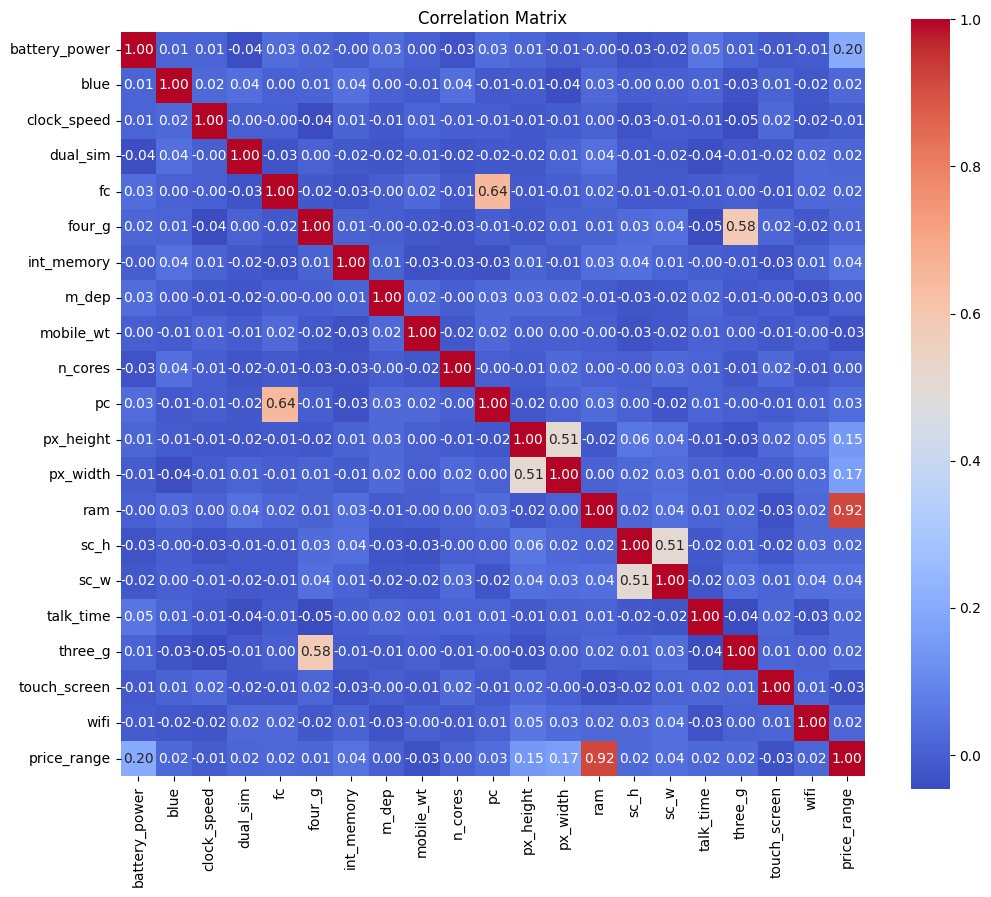

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

## Visual Exploration

In [37]:
custom_palette = sns.color_palette("tab10", n_colors=4)
color_map = {0: custom_palette[0], 1: custom_palette[1], 2: custom_palette[2], 3: custom_palette[3]}

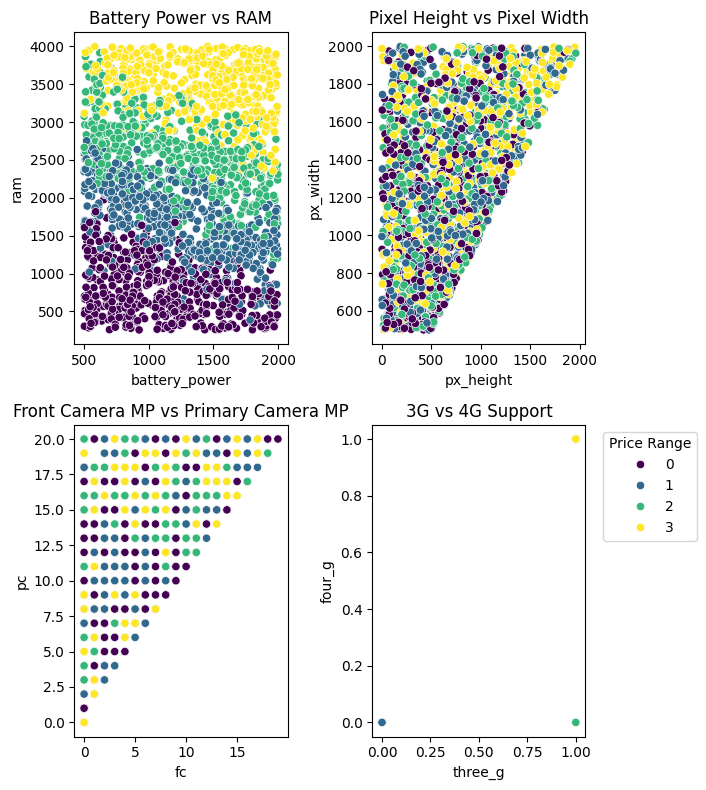

In [41]:
plt.figure(figsize=(8,8))

# battery_power vs ram
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='battery_power', y='ram', hue='price_range', palette="viridis", legend=False)
plt.title('Battery Power vs RAM')

# px_height vs px_width
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='px_height', y='px_width', hue='price_range', palette="viridis", legend=False)
plt.title('Pixel Height vs Pixel Width')

# fc vs pc
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='fc', y='pc', hue='price_range', palette="viridis", legend=False)
plt.title('Front Camera MP vs Primary Camera MP')

# three_g vs four_g
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='three_g', y='four_g', hue='price_range', palette="viridis")
plt.title('3G vs 4G Support')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

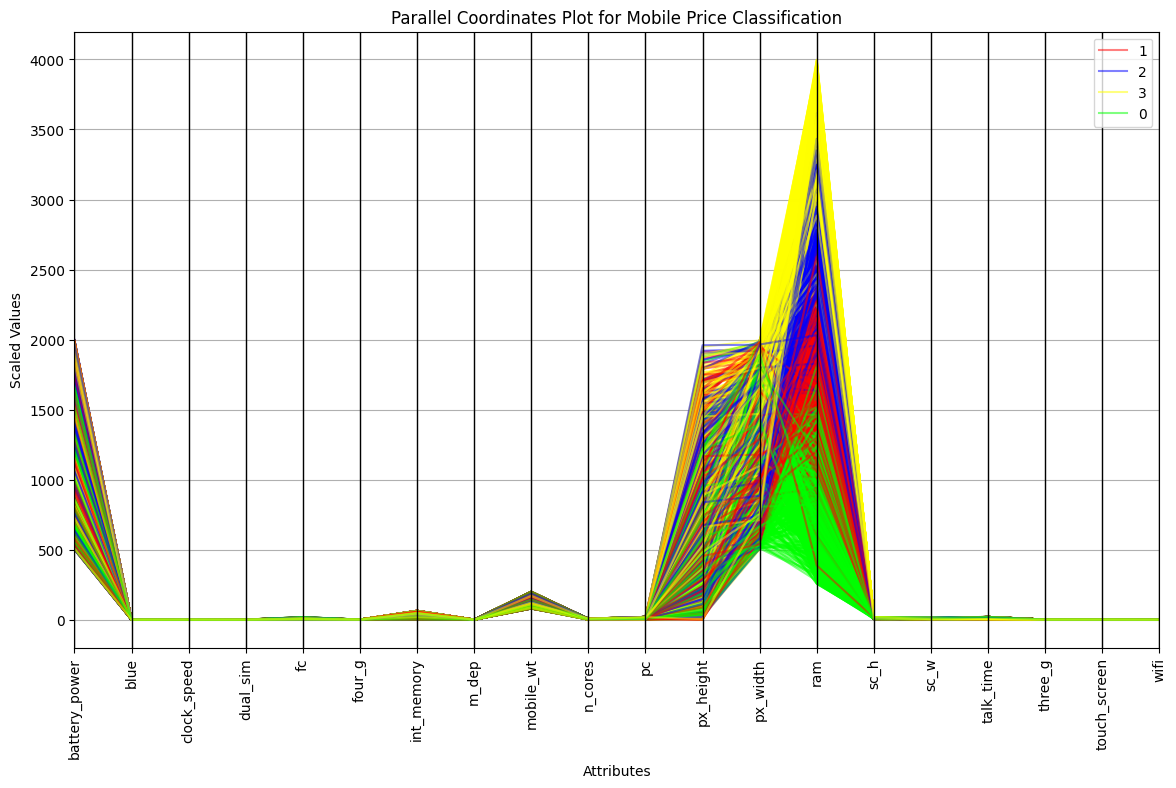

In [44]:
from pandas.plotting import parallel_coordinates

# PARALLEL COORDINATES
plt.figure(figsize=(14, 8))
parallel_coordinates(df, 'price_range', color=('#FF0000', '#0000FF', '#FFFF00', '#00FF00'), alpha=0.5)

plt.title("Parallel Coordinates Plot for Mobile Price Classification")
plt.xlabel("Attributes")
plt.ylabel("Scaled Values")
plt.xticks(rotation=90)
plt.show()

# Data Preparation

## Defining the characteristic of the features

In [12]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


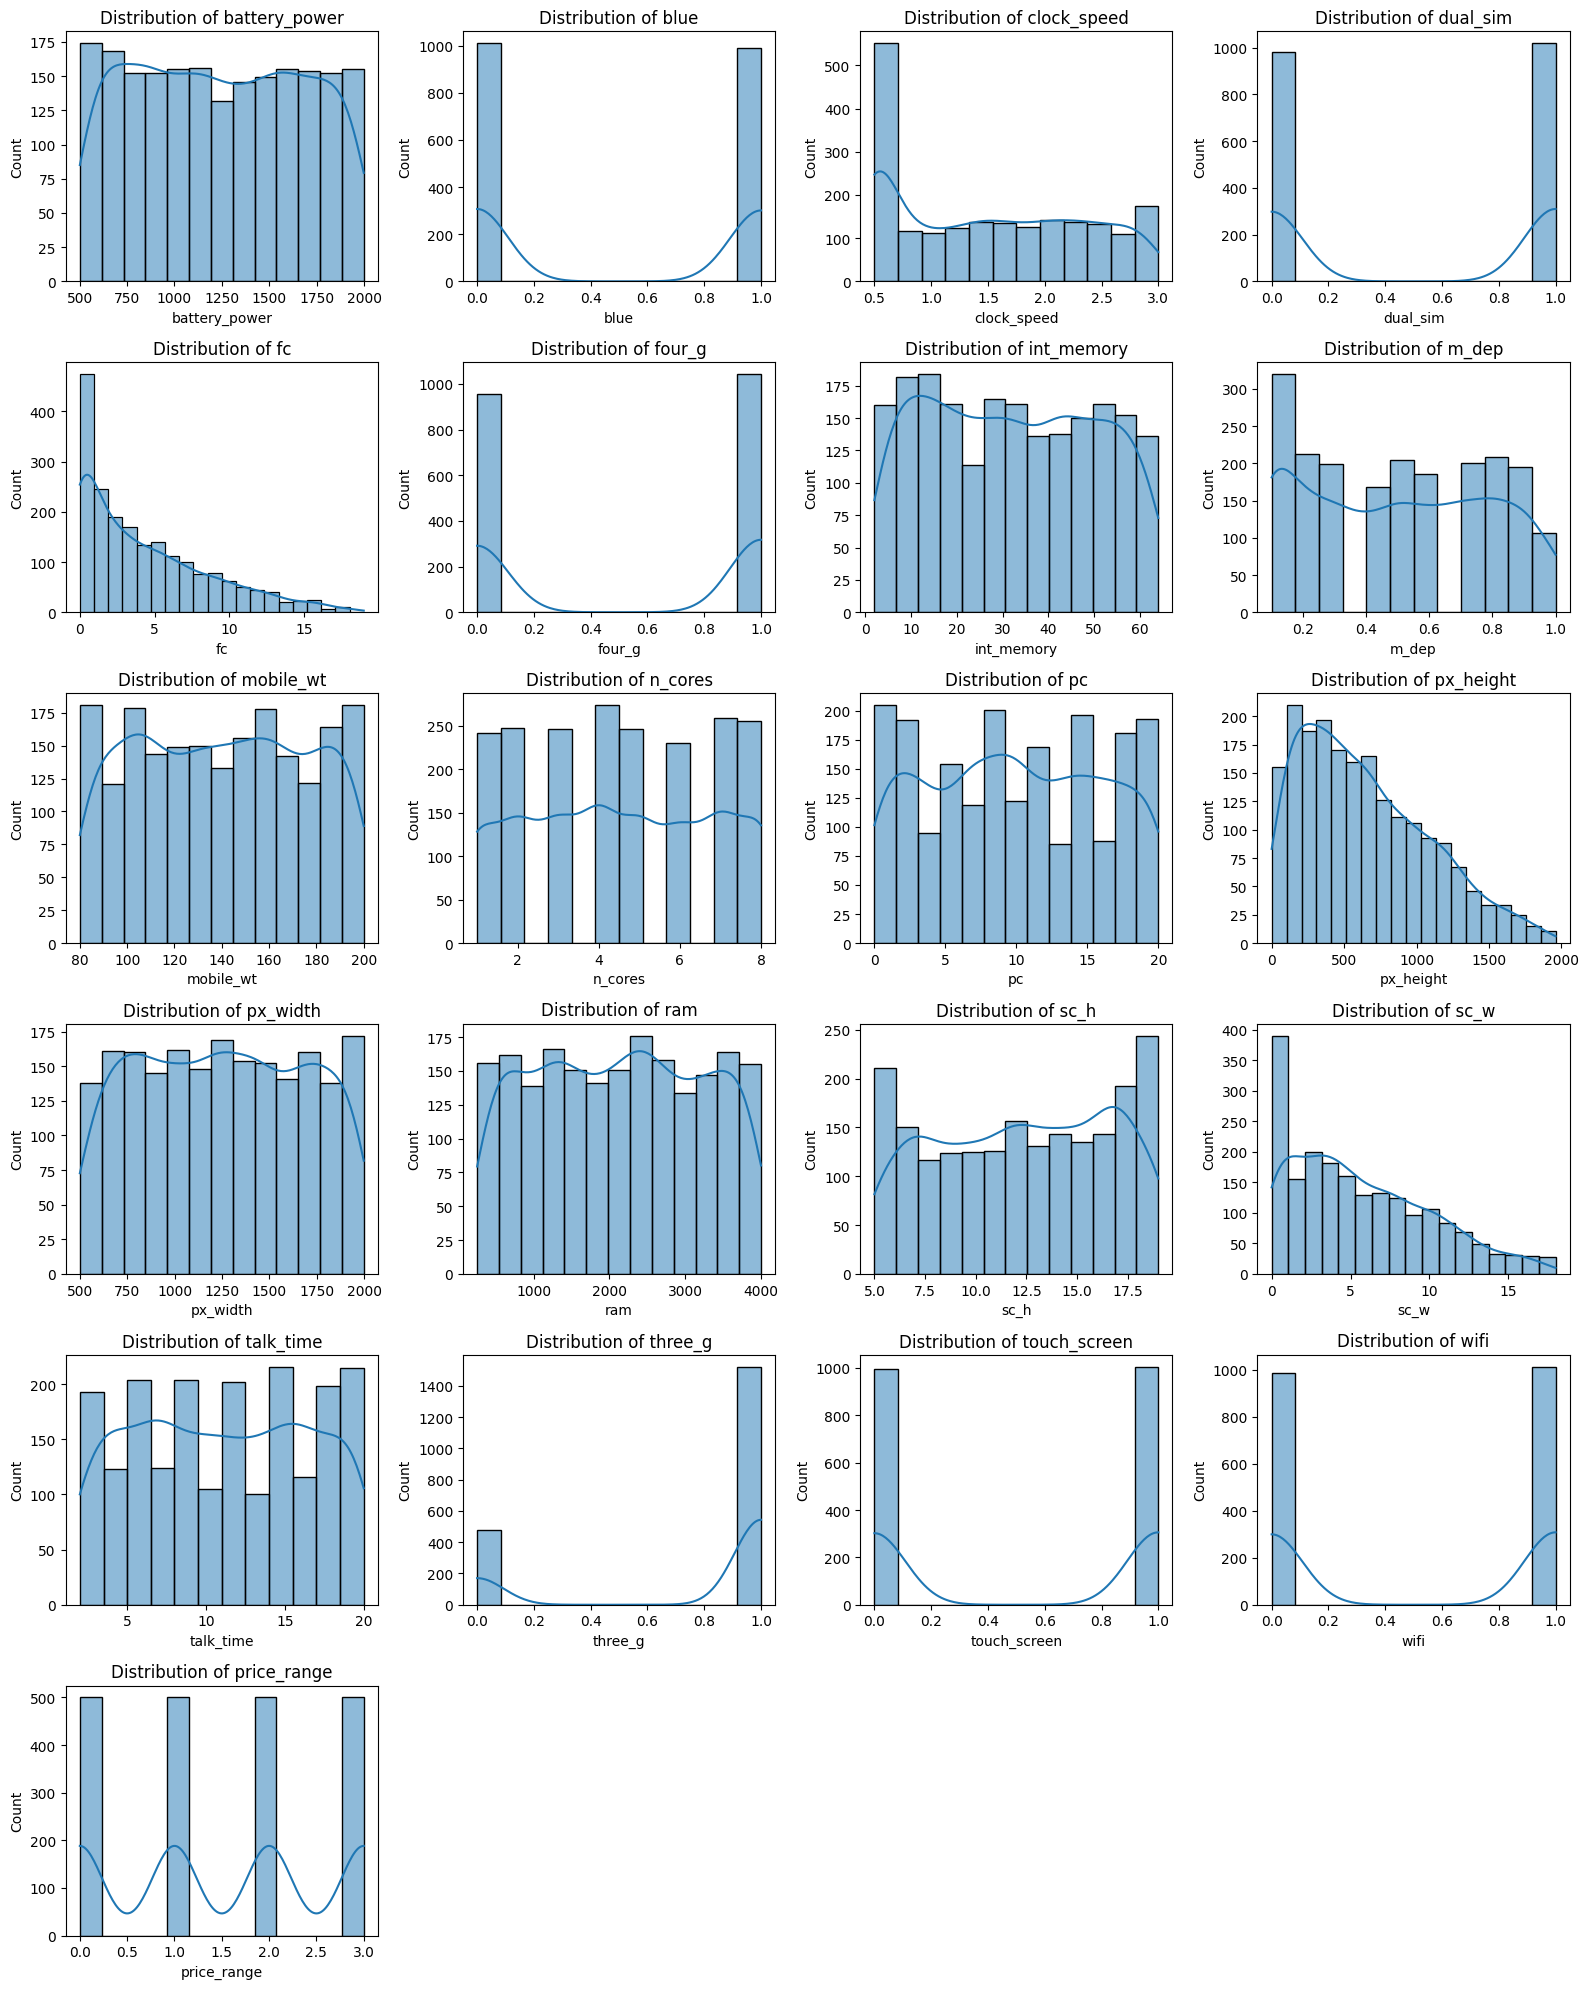

In [13]:
plt.figure(figsize=(16, 20))

for i, column in enumerate(df, start=1):
    plt.subplot(6, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit(df).transform(df), columns=df.columns)

In [15]:
scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214


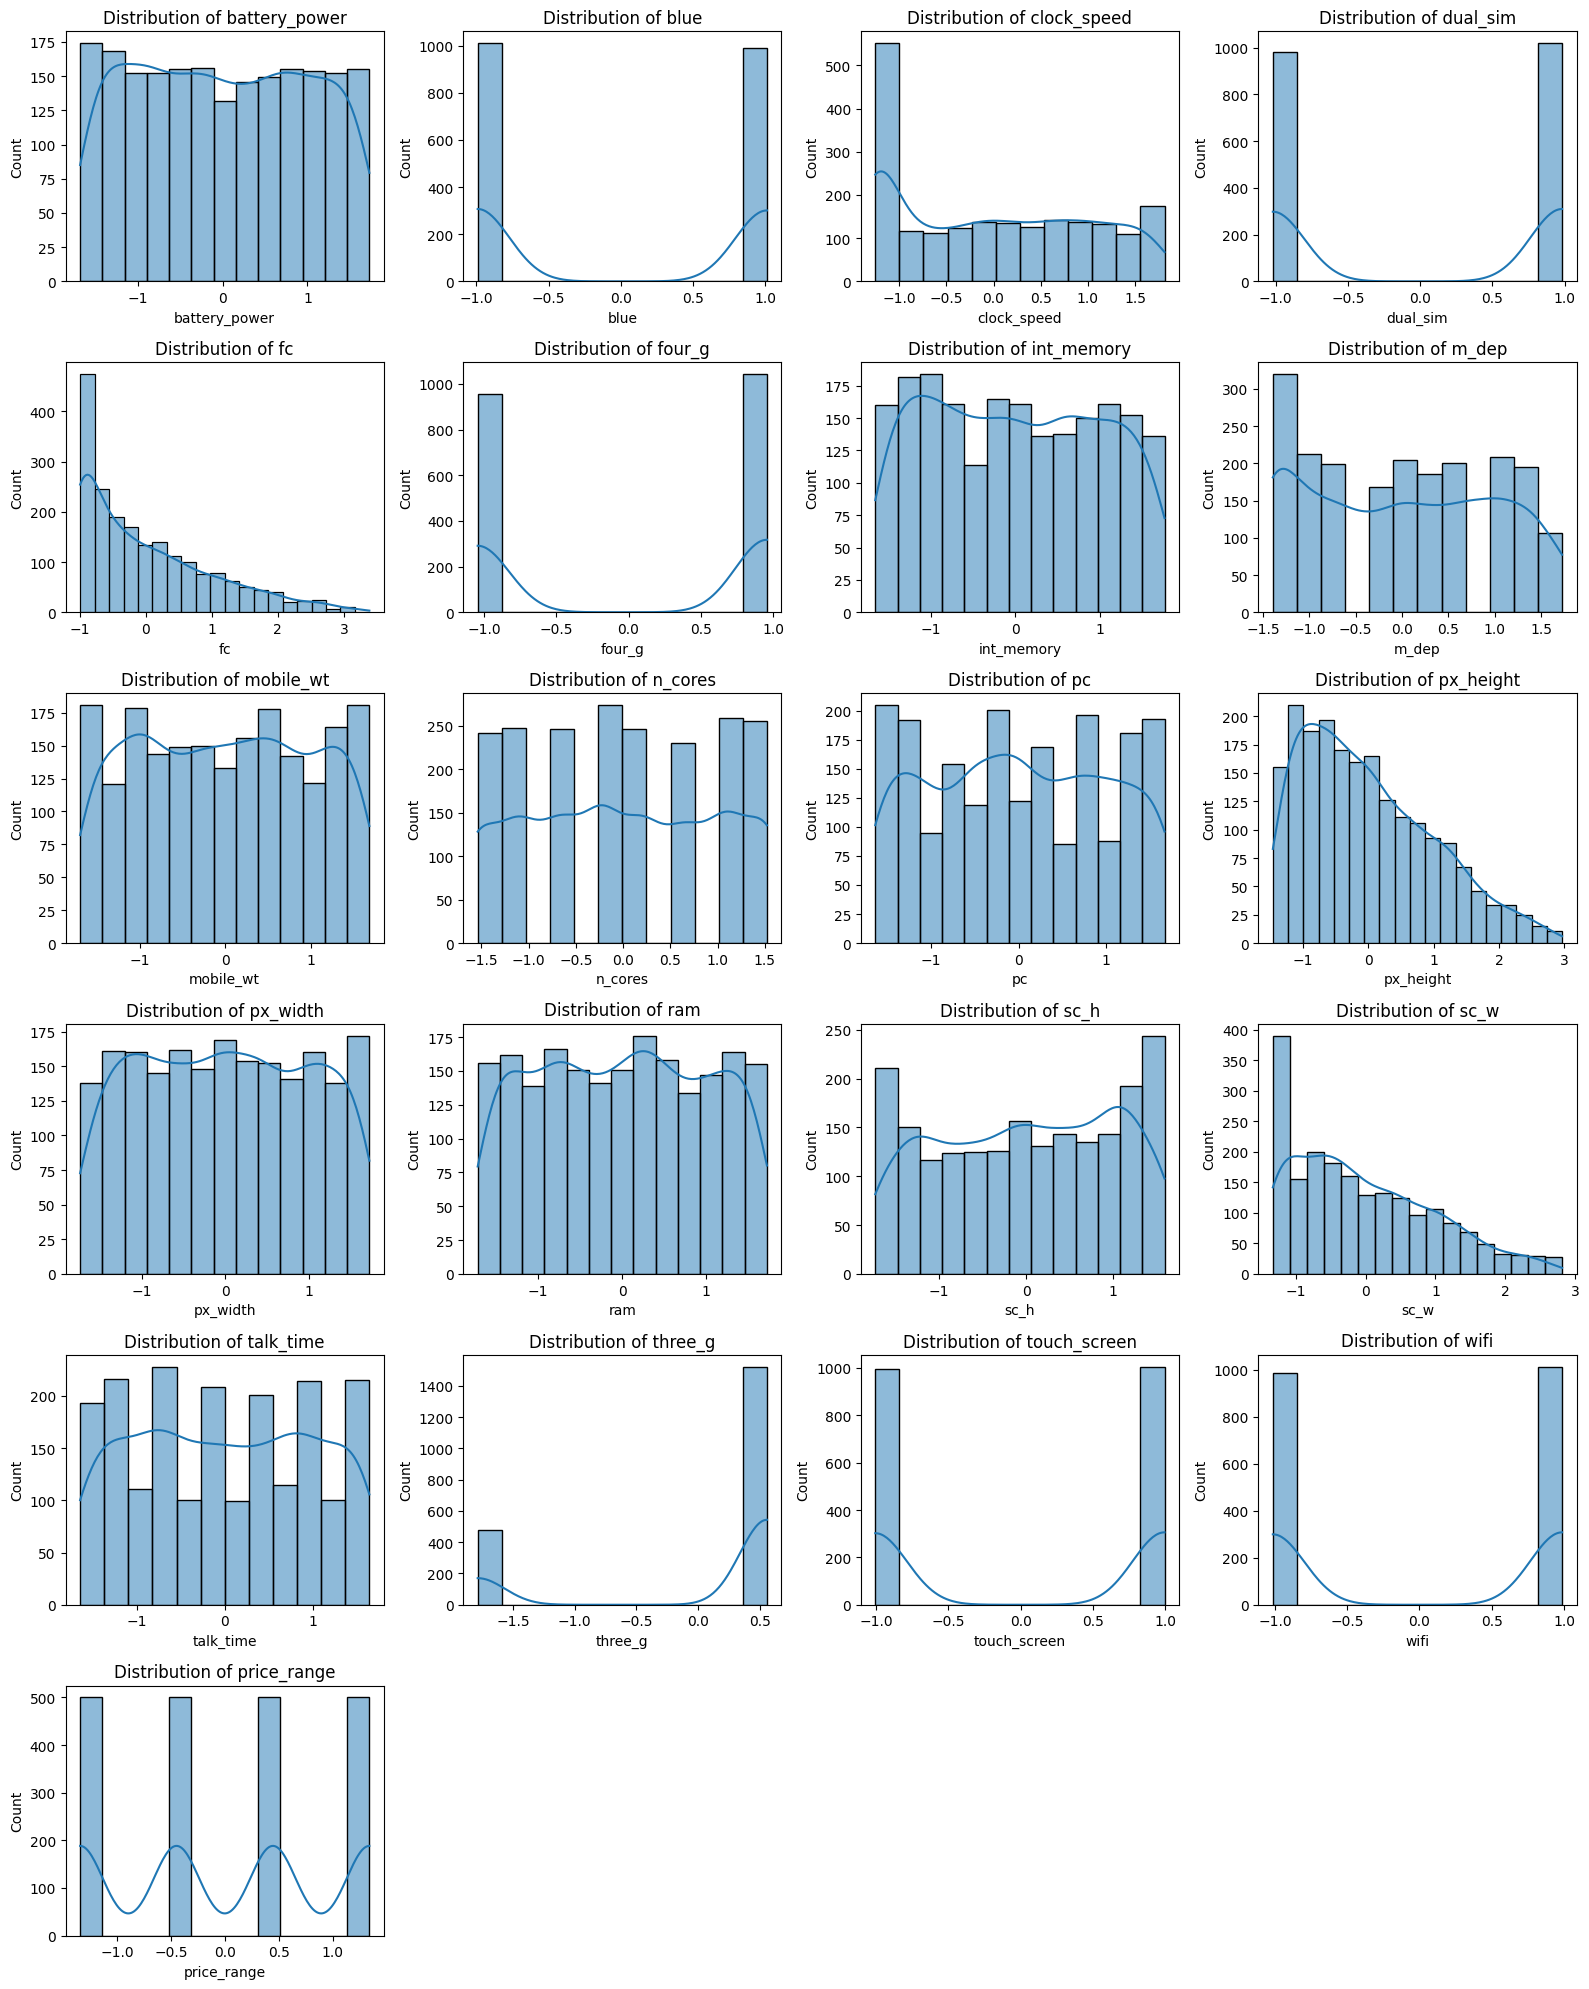

In [16]:
plt.figure(figsize=(16, 20))

for i, column in enumerate(scaled_df, start=1):
    plt.subplot(6, 4, i)
    sns.histplot(scaled_df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

In [17]:
correlation_matrix = scaled_df.corr()

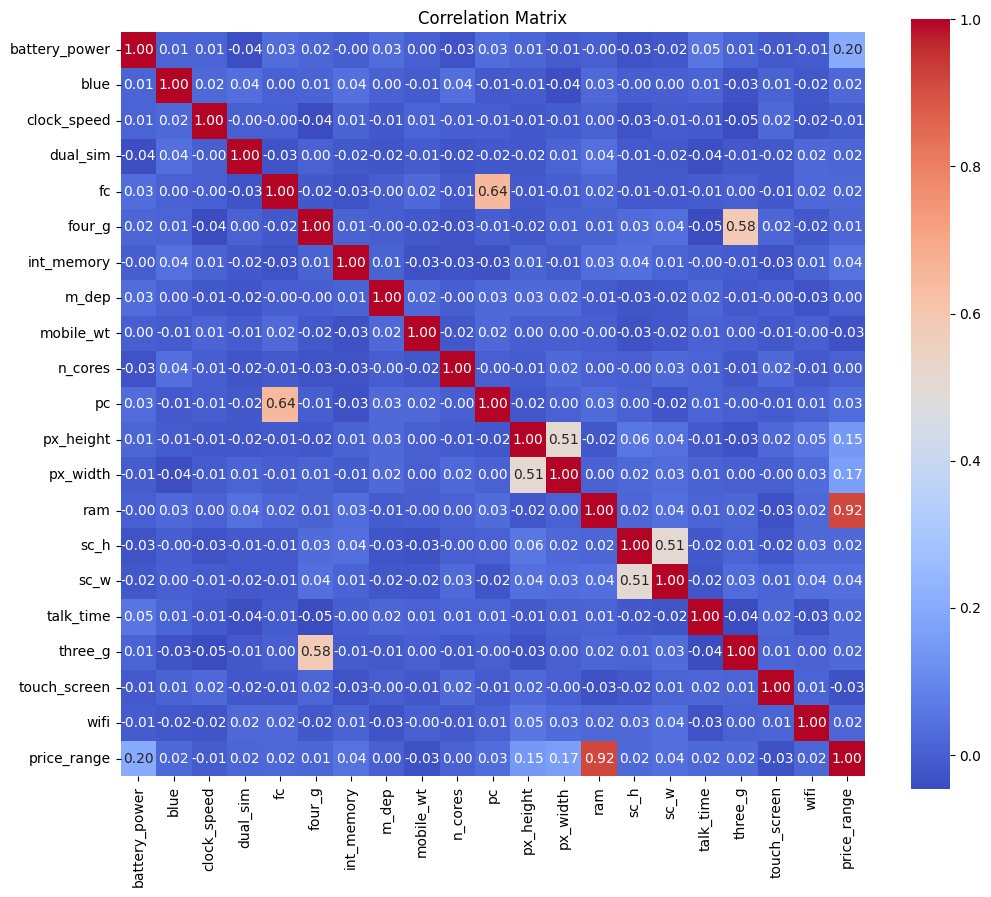

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

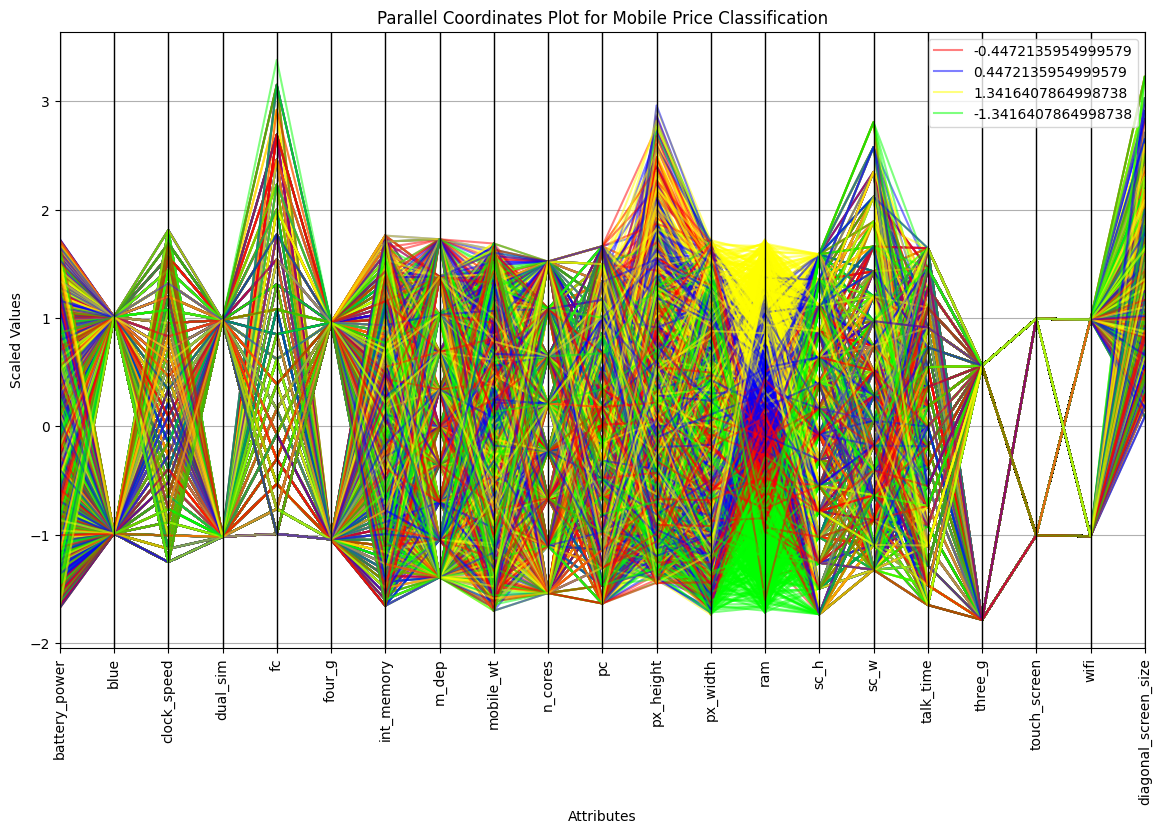

In [46]:
plt.figure(figsize=(14, 8))
parallel_coordinates(scaled_df, 'price_range', color=('#FF0000', '#0000FF', '#FFFF00', '#00FF00'), alpha=0.5)

plt.title("Parallel Coordinates Plot for Mobile Price Classification")
plt.xlabel("Attributes")
plt.ylabel("Scaled Values")
plt.xticks(rotation=90)
plt.show()

## Attribute Derivation Checking



In [19]:
# The Pythagorean theorem was used.
scaled_df['diagonal_screen_size'] = ((scaled_df['sc_w'] ** 2) + (scaled_df['sc_h'] ** 2)) ** 0.5

In [20]:
correlation_matrix = scaled_df.corr()

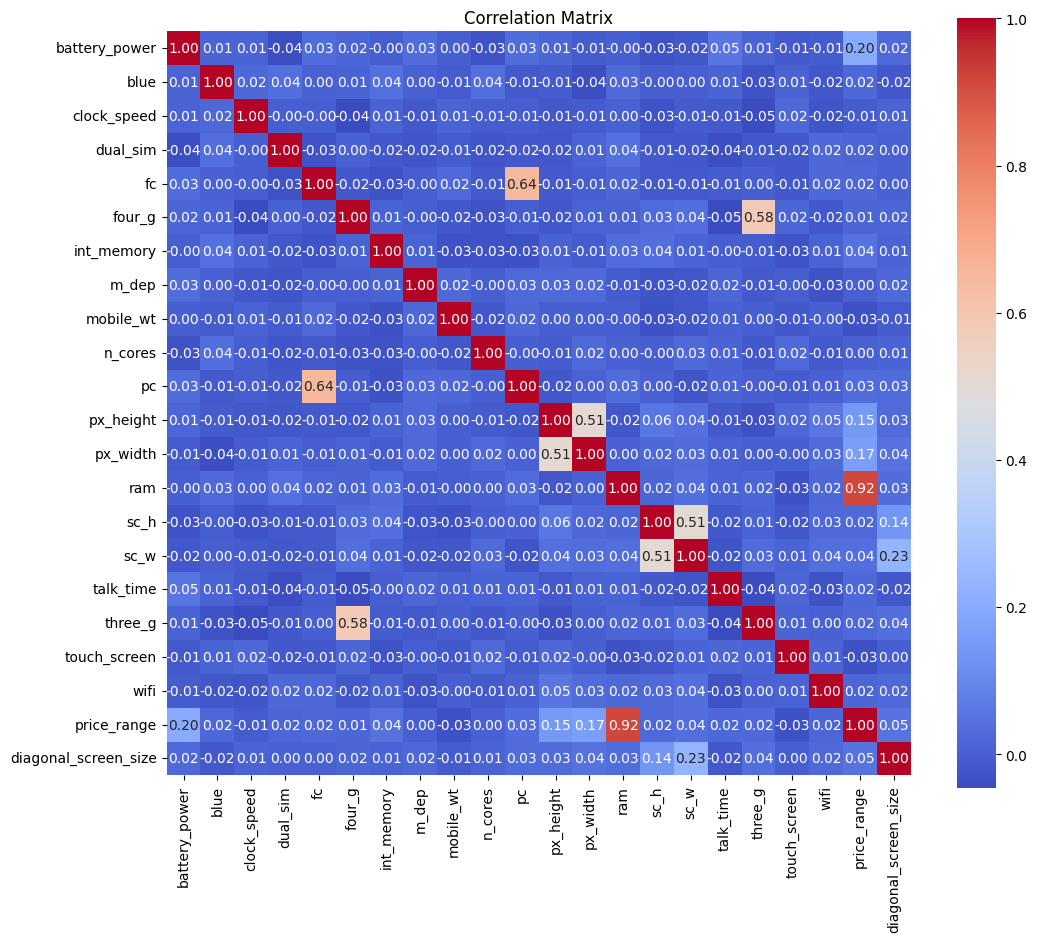

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()